### Imports

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab

### Global

In [2]:
np.random.seed = 12345
BOLD = '\033[1m'
BOLDEND = '\033[0m'
datasets_path = "../Datasets/"

### Variables

In [3]:
# Storing data in dataframes, and dropping a random column with unknown values in it, plus renaming the columns
df_train = pd.read_csv(datasets_path + 
                       "Dataset_1_train.csv", 
                       header = None).drop(labels=2, axis=1).rename(index=str, columns={0: "x", 1: "y"})
df_test = pd.read_csv(datasets_path + 
                      "Dataset_1_test.csv", 
                      header = None).drop(labels=2, axis=1).rename(index=str, columns={0: "x", 1: "y"})
df_val = pd.read_csv(datasets_path + 
                     "Dataset_1_valid.csv", 
                     header = None).drop(labels=2, axis=1).rename(index=str, columns={0: "x", 1: "y"})

# Part 1

### Fit Polynomial (1.a)

In [17]:
# Getting coefficients and getting the function
poly_coefficients = np.polyfit(df_train.x, df_train.y, 20)
poly_fn = np.poly1d(poly_coefficients)

In [18]:
# Function to calculate MSE on a dataset
def get_mean_squared_error(data):
    sum_ = 0
    for x, y in zip(data.x.values, data.y.values):
        sum_ += np.square(y - poly_fn(x))
    return sum_/len(data.x.values)

In [19]:
print("Mean Squared Error on the %sTraning%s dataset is %s%s%s"
      % (BOLD, BOLDEND, BOLD, "{0:.2f}".format(get_mean_squared_error(df_train)), BOLDEND))
print("Mean Squared Error on the %sValidation%s dataset is %s%s%s"
      % (BOLD, BOLDEND, BOLD, "{0:.2f}".format(get_mean_squared_error(df_val)), BOLDEND))

Mean Squared Error on the Traning dataset is 6.47
Mean Squared Error on the Validation dataset is 1418.51


### Visualization (1.b)

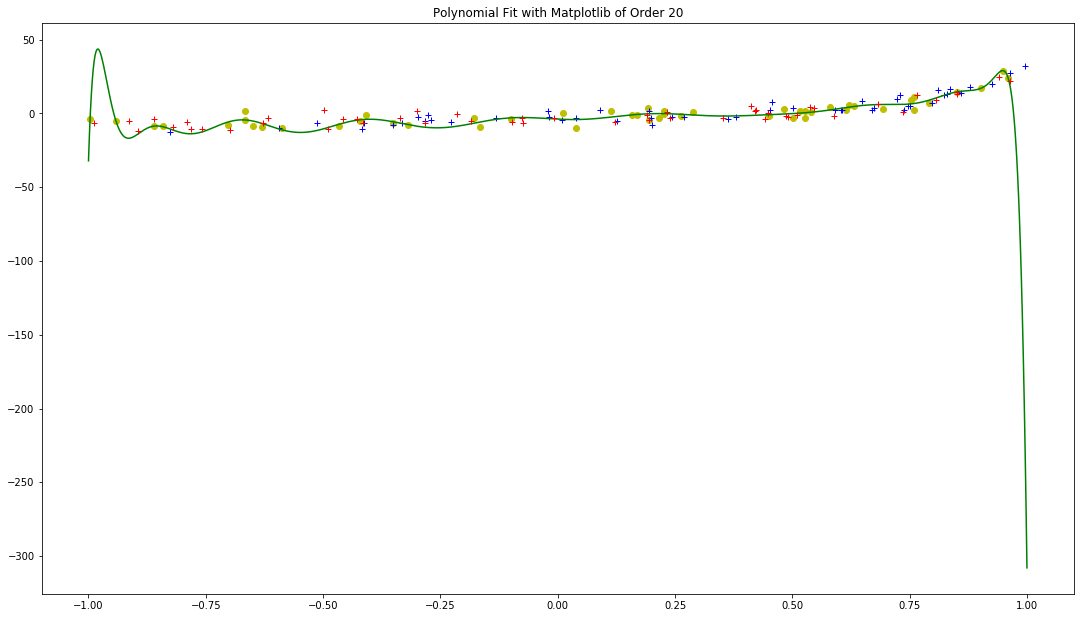

In [31]:
# Straight green line is the regression
# Yellow dots are training dataset
# Blue dots are validation dataset
# Red dots are testing dataset

def plot_fit(poly_fn, title = "Polynomial Fit with Matplotlib of Order 20"):
    x = df_train.x
    y = df_train.y
    fit_x = np.linspace(-1, 1, 1000)
    fit_y = poly_fn(fit_x)
    plt.plot(x,y,'yo', df_val.x, df_val.y, 'b+', fit_x, fit_y, 'g', df_test.x, df_test.y, 'r+')
    pylab.title(title)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
plot_fit(poly_fn)

### Analysis (1.c)

In [16]:
print("Mean Squared Error on the %sTesting%s dataset is %s%s%s"
      % (BOLD, BOLDEND, BOLD, "{0:.2f}".format(get_mean_squared_error(df_test)), BOLDEND))

Mean Squared Error on the Testing dataset is 50.62


The model is overfitting the traning dataset. 
1. The Mean Squared Error is much larger on the Testing dataset than on the Traning dataset. 
2. The MSE of the Validation dataset is off charts due to the overfitting (not enough observation in training dataset).
3. The graph shows the regression ondulate trying to overfit datapoints from the traning dataset.

# Part 2

In [57]:
def regularize(x, y, lbd):
    x_t = np.transpose(x)
    lbd_I = np.diag(np.full(len(x), lbd))
    inv = np.linalg.inv(x_t * x + lbd_I)
    return inv*x_t*y

In [61]:
w = regularize(df_train.x.values, df_train.y.values, 0.05)

TypeError: regularize() takes 2 positional arguments but 3 were given

In [70]:
def regularize(w, lbd):
    w_ = np.sum(np.transpose(w)*w)
    e = lbd*w
    return e

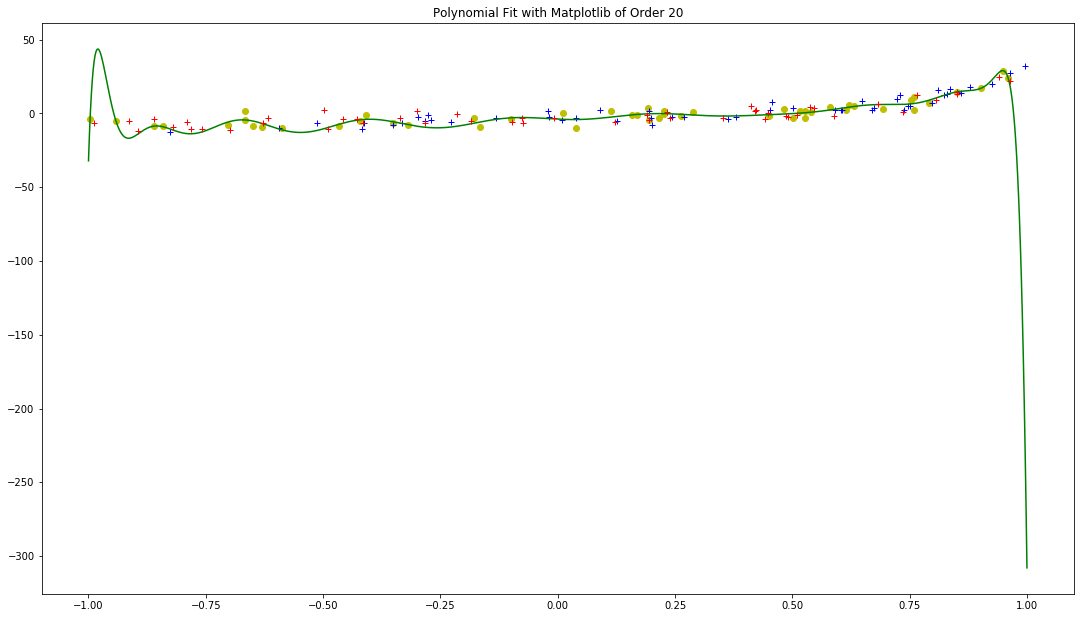

In [71]:
w = regularize(poly_coefficients, 0.001)
poly_fn_1 = np.poly1d(poly_coefficients)
plot_fit(poly_fn_1)

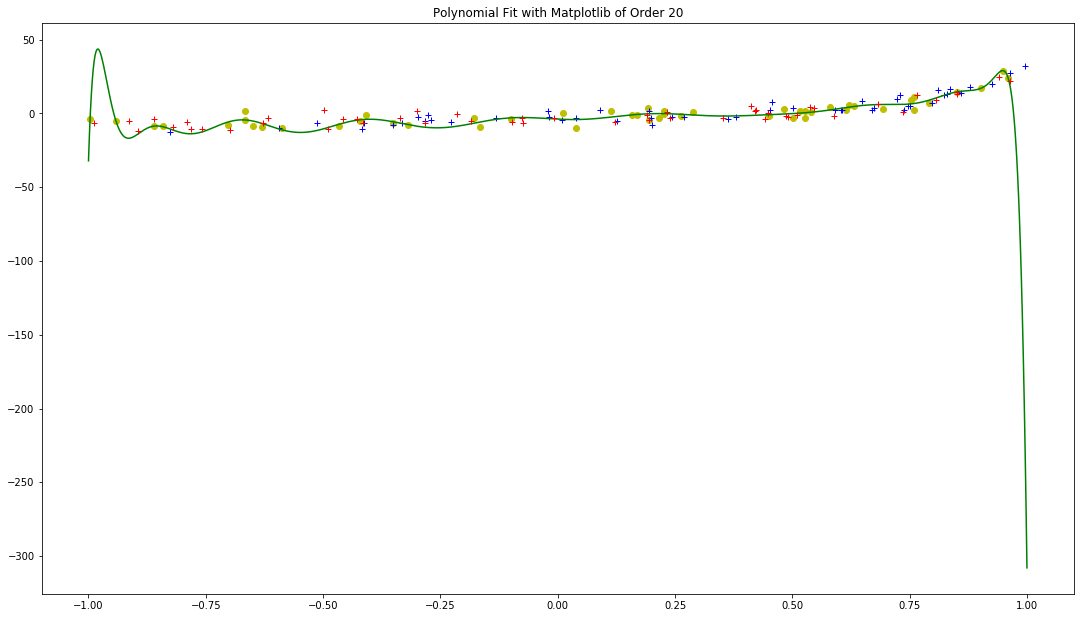

In [72]:
w = regularize(poly_coefficients, 0.01)
poly_fn_1 = np.poly1d(poly_coefficients)
plot_fit(poly_fn_1)

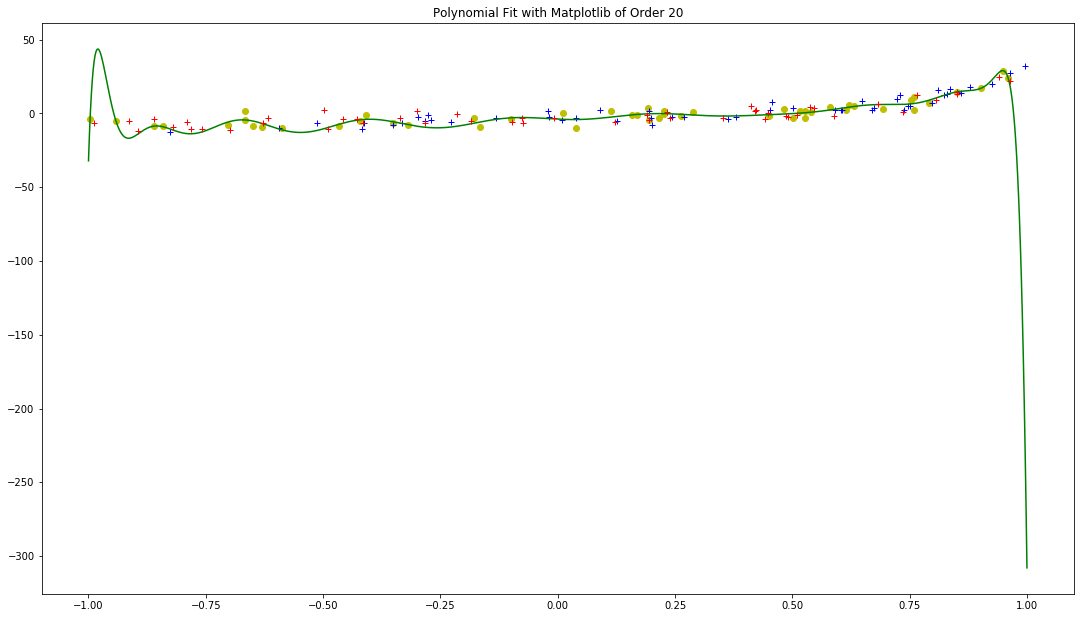

In [73]:
w = regularize(poly_coefficients, 0.02)
poly_fn_1 = np.poly1d(poly_coefficients)
plot_fit(poly_fn_1)

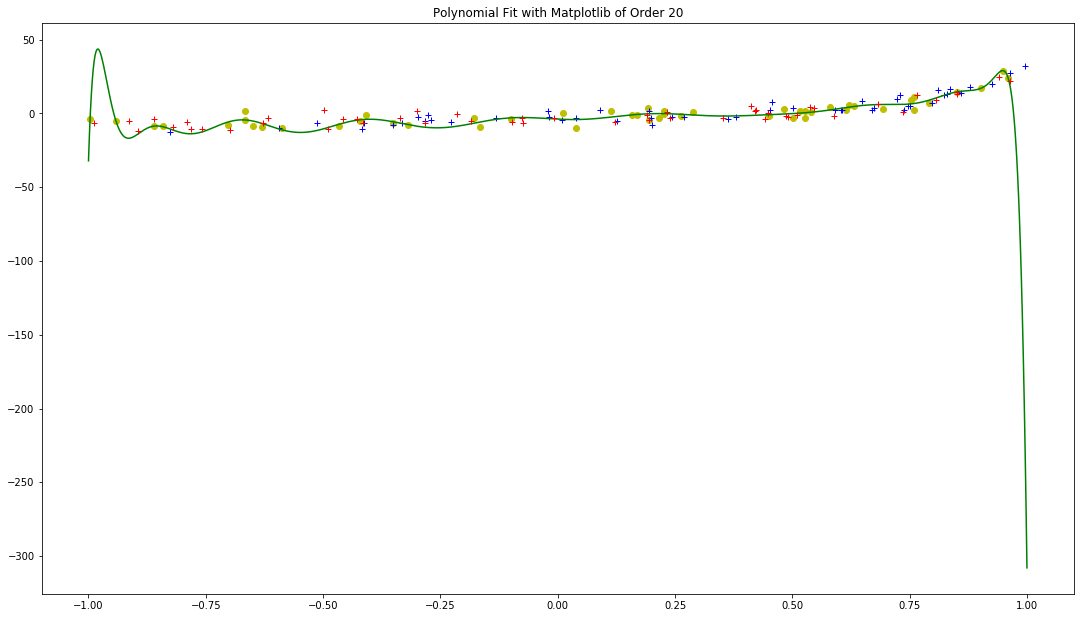

In [74]:
w = regularize(poly_coefficients, 0.04)
poly_fn_1 = np.poly1d(poly_coefficients)
plot_fit(poly_fn_1)

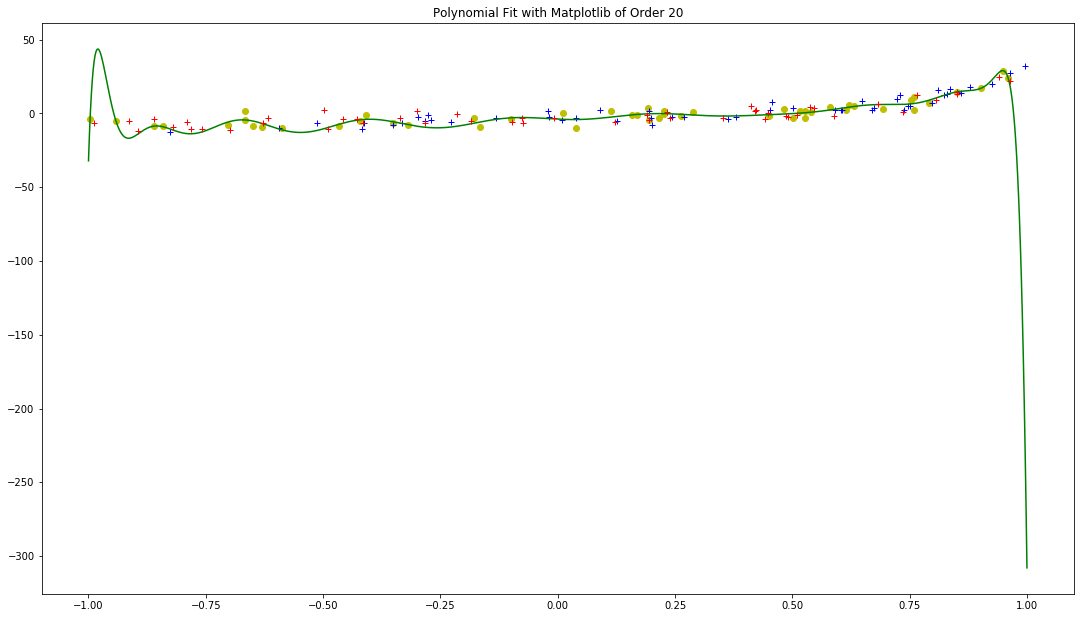

In [75]:
w = regularize(poly_coefficients, 0.05)
poly_fn_1 = np.poly1d(poly_coefficients)
plot_fit(poly_fn_1)

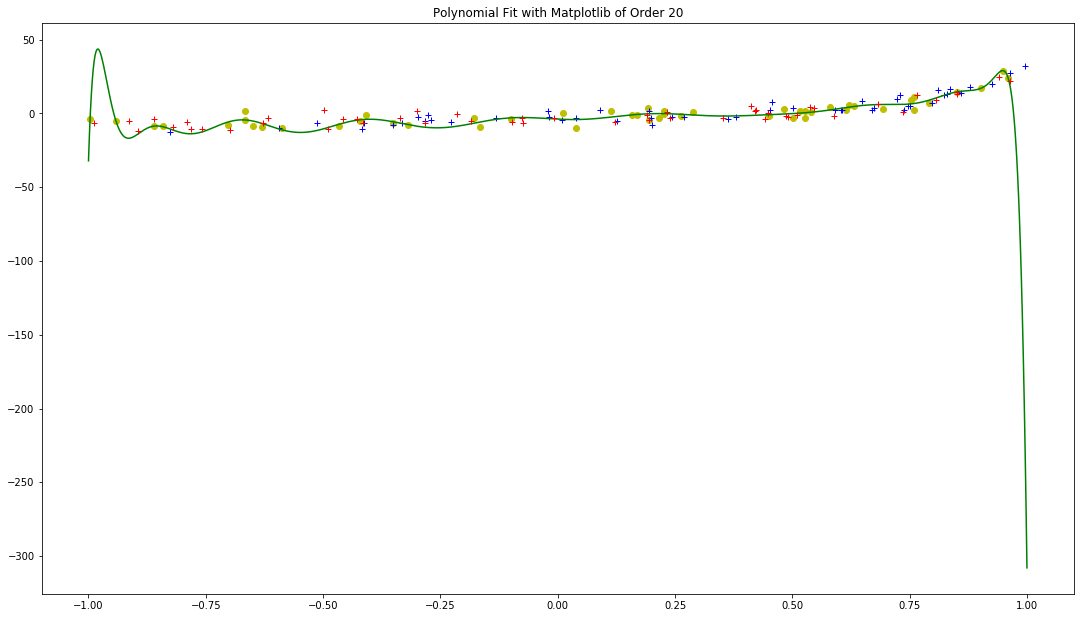

In [76]:
w = regularize(poly_coefficients, 0.07)
poly_fn_1 = np.poly1d(poly_coefficients)
plot_fit(poly_fn_1)

In [77]:
poly_fn_1 = np.poly1d(poly_coefficients)

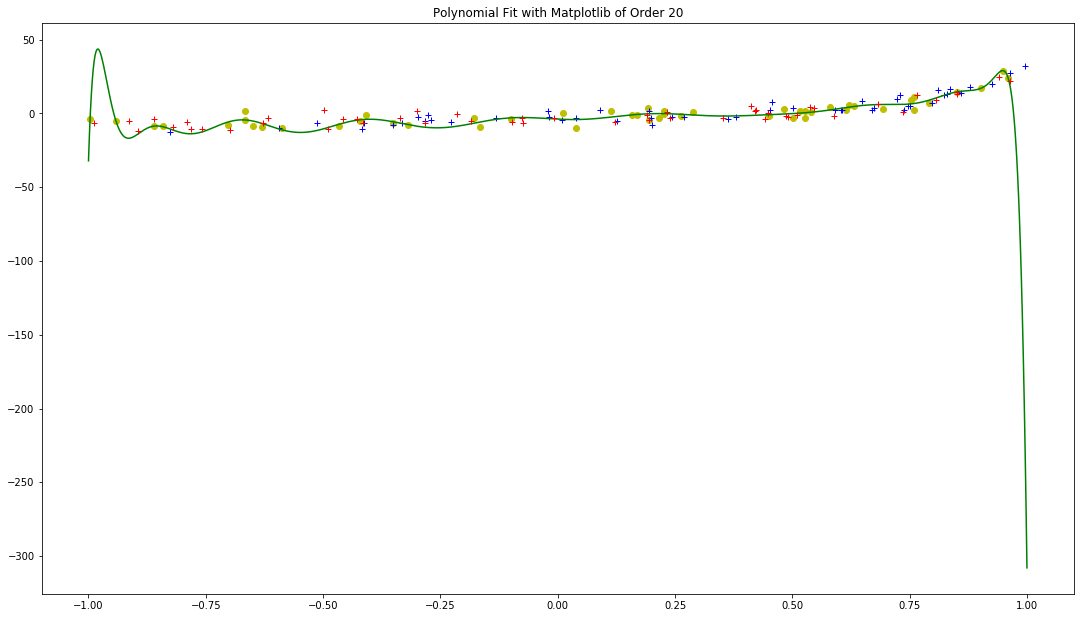

In [66]:
plot_fit(poly_fn_1)